# Data processing

✅What are the factors that influence diamond prices?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### load data

In [2]:
# load data
data = sns.load_dataset('diamonds')
print(data, data.shape)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns] (53940, 10)


## Missing value

In [3]:
# Check missing value
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

if data have missing value,
- remove column
- replace data to mean,std,mode

...


## Data labeling

: transfrom categorical text to number

In [4]:
data['cut']

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [5]:
data['color']

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: category
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [6]:
data['clarity']

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: category
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

#### Apply ordinal Encoder for 'cut' that has order of goodness and badness, label encoder for 'color', 'clarity' 

In [7]:
# Ordinal Encoder
temp_dict = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2,'Fair':1}
data["cut"] = data['cut'].map(temp_dict)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['color'] = le.fit_transform(data['color'])
data['clarity'] = le.fit_transform(data['clarity'])

In [9]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,4,3,61.0,58.0,2757,6.15,6.12,3.74


✅ if you want to split train/test data, do it before scaling

## Data scaling
- MinMax Scaler: value range beweetn 0 and 1
- Standard Scaler: mean of 0 and a standard deviation of 1

->reason why use MinMax: the distribution is not Gaussan

https://vitalflux.com/minmaxscaler-standardscaler-python-examples/

In [10]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
data = mmscaler.fit_transform(data)

In [11]:
type(data)

numpy.ndarray

In [12]:
df = pd.DataFrame(data, columns=['Carat','Cut','Color','Clarity','Depth','Table','Price','X','Y','Z'])

In [13]:
df

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.006237,1.00,0.166667,0.428571,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,0.75,0.166667,0.285714,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,0.25,0.166667,0.571429,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,0.75,0.833333,0.714286,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,0.25,1.000000,0.428571,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478
...,...,...,...,...,...,...,...,...,...,...
53935,0.108108,1.00,0.000000,0.285714,0.494444,0.269231,0.131427,0.535382,0.097793,0.110063
53936,0.108108,0.25,0.000000,0.285714,0.558333,0.230769,0.131427,0.529795,0.097623,0.113522
53937,0.103950,0.50,0.000000,0.285714,0.550000,0.326923,0.131427,0.527002,0.096435,0.111950
53938,0.137214,0.75,0.666667,0.428571,0.500000,0.288462,0.131427,0.572626,0.103905,0.117610


## Correlation

<AxesSubplot:>

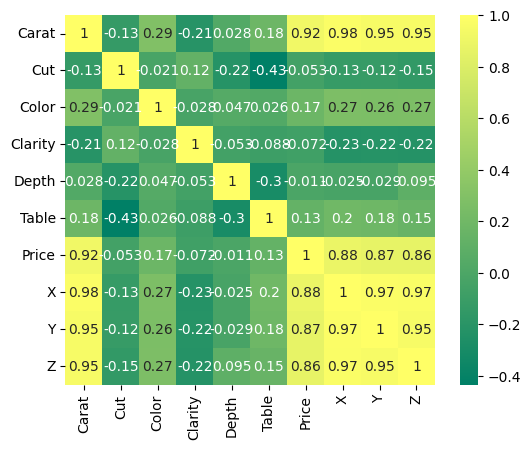

In [14]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True, cmap='summer', square=True)

#### High correlative with carrat, x,y,z and low correlative with clarity, cut,color, depth, table

In [15]:
#drop
df = df.drop(['Cut','Color','Clarity','Depth','Table'], axis=1)

In [16]:
df

,Carat,Price,X,Y,Z
0,0.006237,0.000000,0.367784,0.067572,0.076415
1,0.002079,0.000000,0.362197,0.065195,0.072642
2,0.006237,0.000054,0.377095,0.069100,0.072642
3,0.018711,0.000433,0.391061,0.071817,0.082704
4,0.022869,0.000487,0.404097,0.073854,0.086478
...,...,...,...,...,...
53935,0.108108,0.131427,0.535382,0.097793,0.110063
53936,0.108108,0.131427,0.529795,0.097623,0.113522
53937,0.103950,0.131427,0.527002,0.096435,0.111950
53938,0.137214,0.131427,0.572626,0.103905,0.117610


<AxesSubplot:>

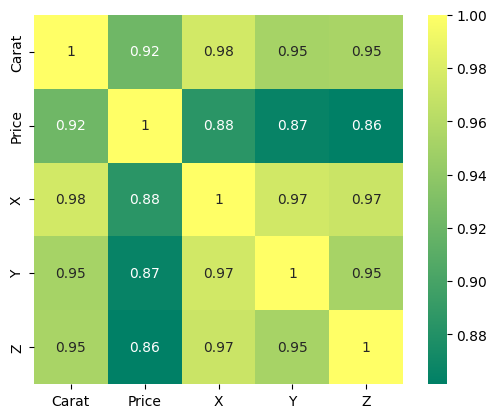

In [17]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True, cmap='summer', square=True)

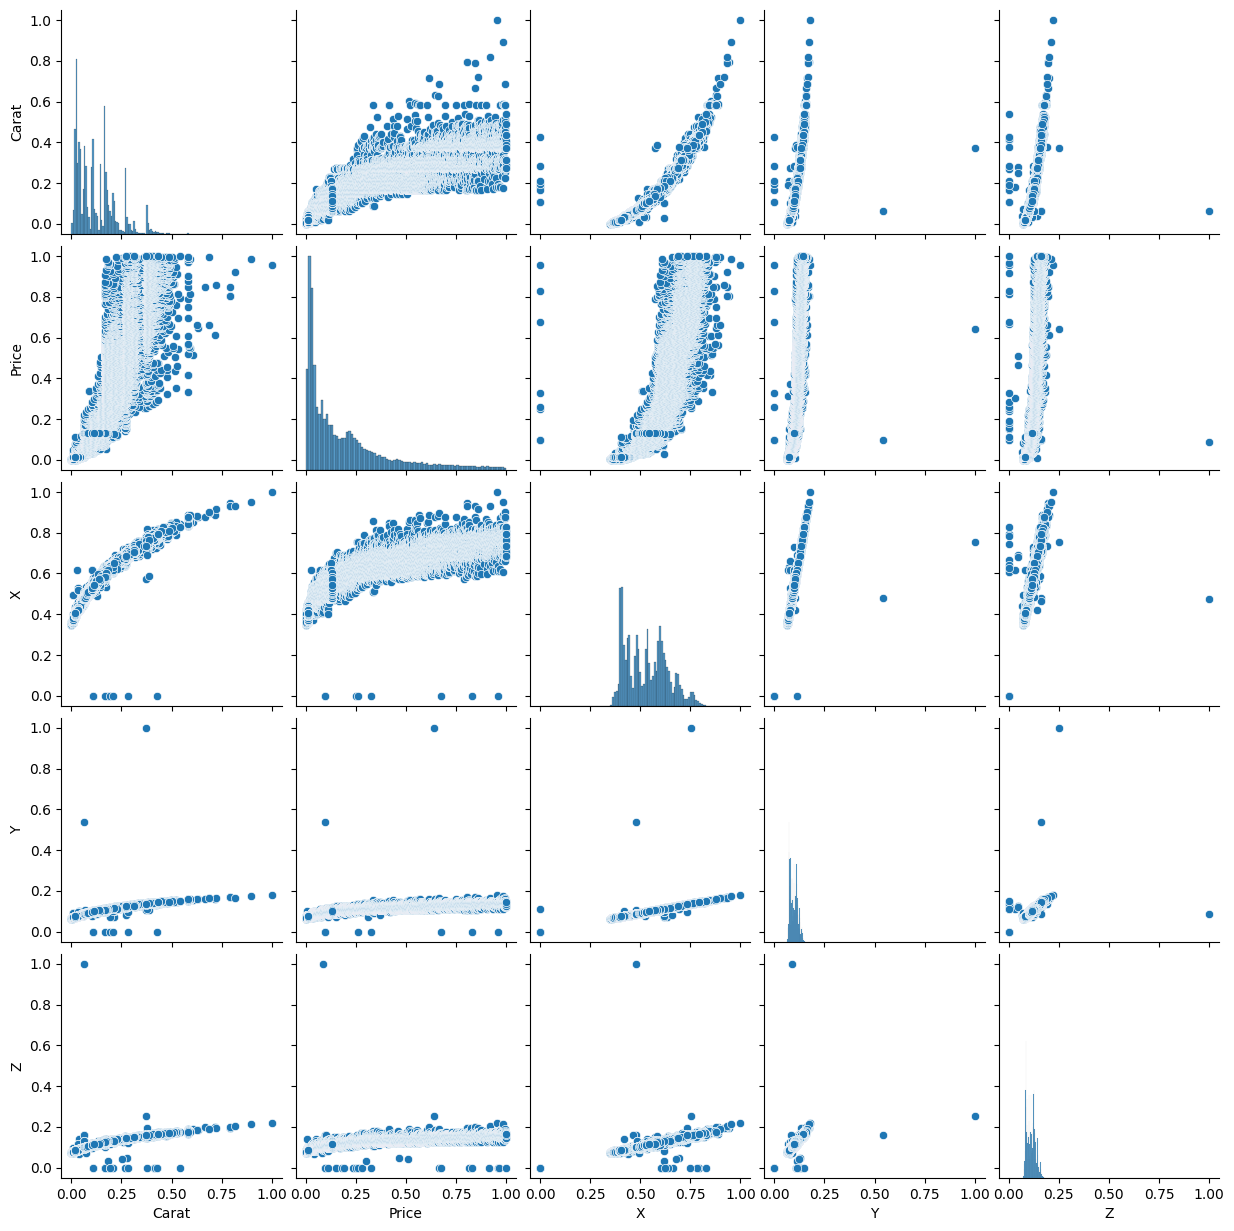

In [19]:
sns.pairplot(df)
plt.show()

## Dimension reduction:PCA

In [20]:
dim = df.loc[:,['X','Y','Z']]
dim

,X,Y,Z
0,0.367784,0.067572,0.076415
1,0.362197,0.065195,0.072642
2,0.377095,0.069100,0.072642
3,0.391061,0.071817,0.082704
4,0.404097,0.073854,0.086478
...,...,...,...
53935,0.535382,0.097793,0.110063
53936,0.529795,0.097623,0.113522
53937,0.527002,0.096435,0.111950
53938,0.572626,0.103905,0.117610


In [21]:
from sklearn.decomposition import PCA

# create model
pca = PCA(n_components=1)
pca.fit(dim)

# transform data
transformed_data = pca.transform(dim)

In [22]:
transformed_data

array([[ 0.17206561],
       [ 0.17862013],
       [ 0.16357326],
       ...,
       [ 0.00641674],
       [-0.04000834],
       [-0.00991081]])

In [23]:
transformed_data.shape

(53940, 1)

In [24]:
#explainable variance
explained_variance_ratio = pca.explained_variance_ratio_
print("explainable:", explained_variance_ratio)

explainable: [0.99615538]


In [25]:
#compenents
components = pca.components_
print("components:", components)

components: [[-0.96420217 -0.1748023  -0.1993949 ]]


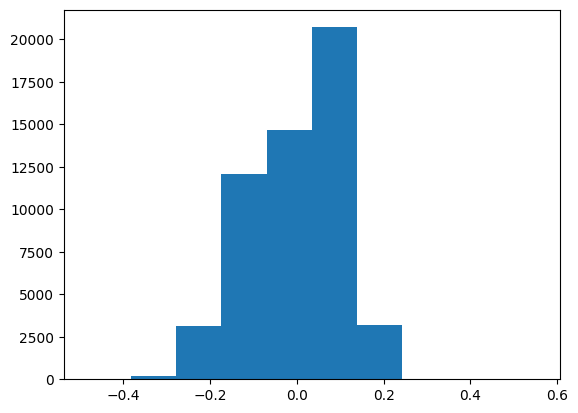

In [26]:
plt.hist(transformed_data)
plt.show()

In [27]:
# Add transform columns
df = df.drop(['X','Y','Z'], axis=1)
df['Dim'] = pd.DataFrame(transformed_data)
print(df)

          Carat     Price       Dim
0      0.006237  0.000000  0.172066
1      0.002079  0.000000  0.178620
2      0.006237  0.000054  0.163573
3      0.018711  0.000433  0.147625
4      0.022869  0.000487  0.133948
...         ...       ...       ...
53935  0.108108  0.131427 -0.001524
53936  0.108108  0.131427  0.003202
53937  0.103950  0.131427  0.006417
53938  0.137214  0.131427 -0.040008
53939  0.114345  0.131427 -0.009911

[53940 rows x 3 columns]


### carat is expected to significant impact on price of diamond

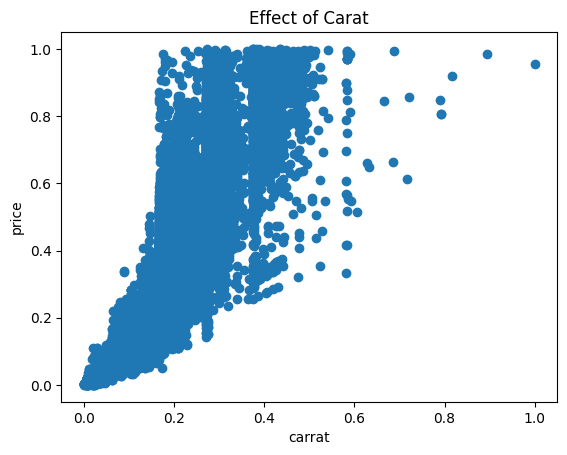

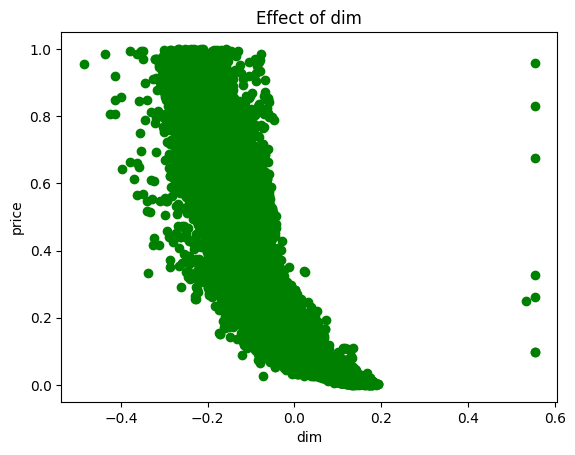

In [28]:
plt.scatter(df['Carat'], df['Price'])
plt.xlabel('carrat')
plt.ylabel('price')
plt.title('Effect of Carat')
plt.show()

plt.scatter(df['Dim'], df['Price'], color='g')
plt.xlabel('dim')
plt.ylabel('price')
plt.title('Effect of dim')
plt.show()